In [1]:
from graph import *
from graph_characteristic import calculate_number_triangle, calculate_clique_number
from graph_simulate_statistics import *

# **Часть I. Исследование свойств характеристики**

**Зафиксируем характеристики.**

* количество точек сочленения для KNN графа

* максимальная степень вершины для Distance графа

In [2]:
T_KNN_FOO = calculate_number_triangle
T_DIST_FOO = calculate_clique_number

In [3]:
VECTOR_SIZE = 50
NUMBER_NEIGHBOURS = 5
MAX_DISTANCE = 0.1
NUM_SAMPLES = 500

## **$Τ$ в зависимости от параметров распределений $θ$ и $υ$**

 **Зафиксируем размер выборки и параметр процедуры построения графа.**

* Размер выборки сделам 500

* Для KNN графа обойдемся 5-ю ближайщими соседями

* Для Distance графа утсановим расстояние связи в 0.1

Также зафиксируем количество вершин в графе (оно же размерность случайного вектора).

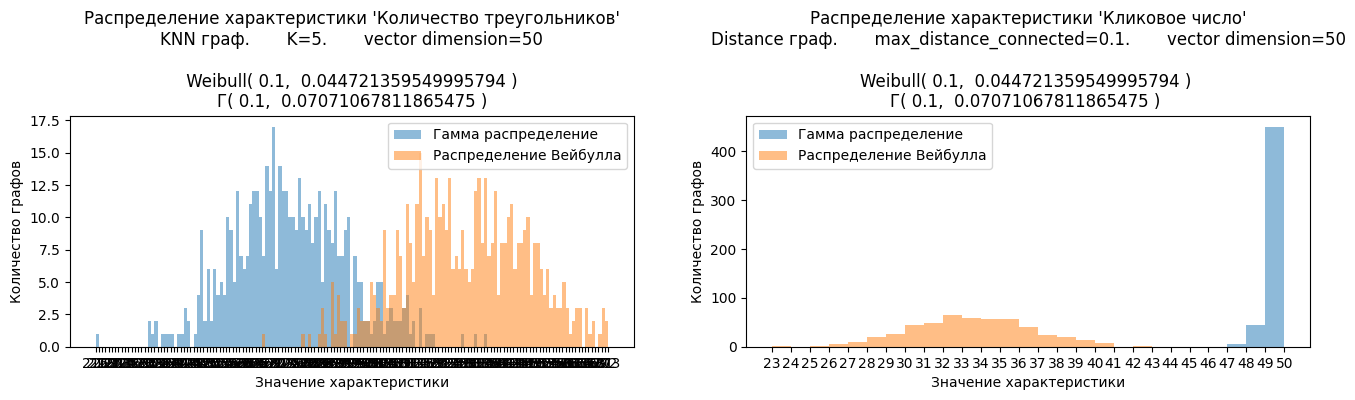

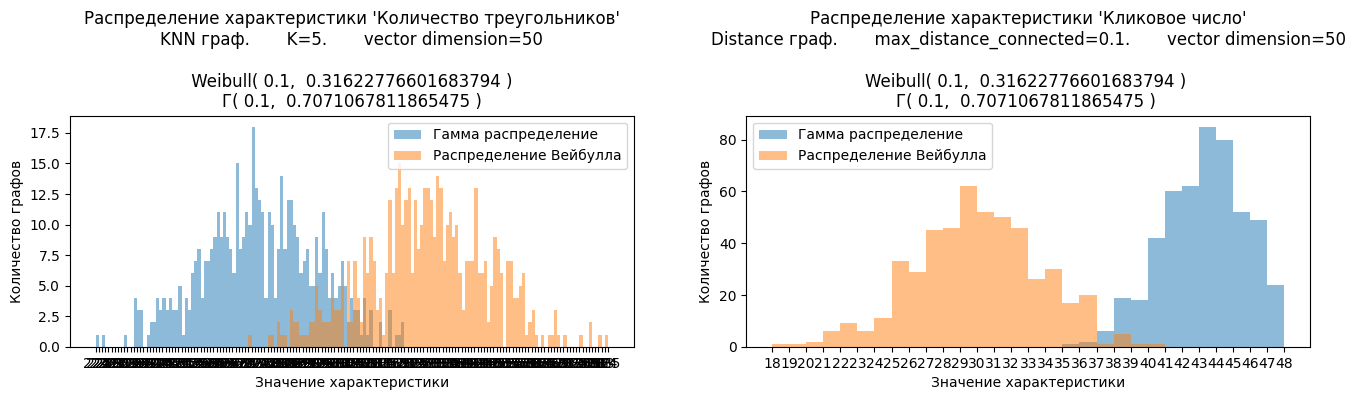

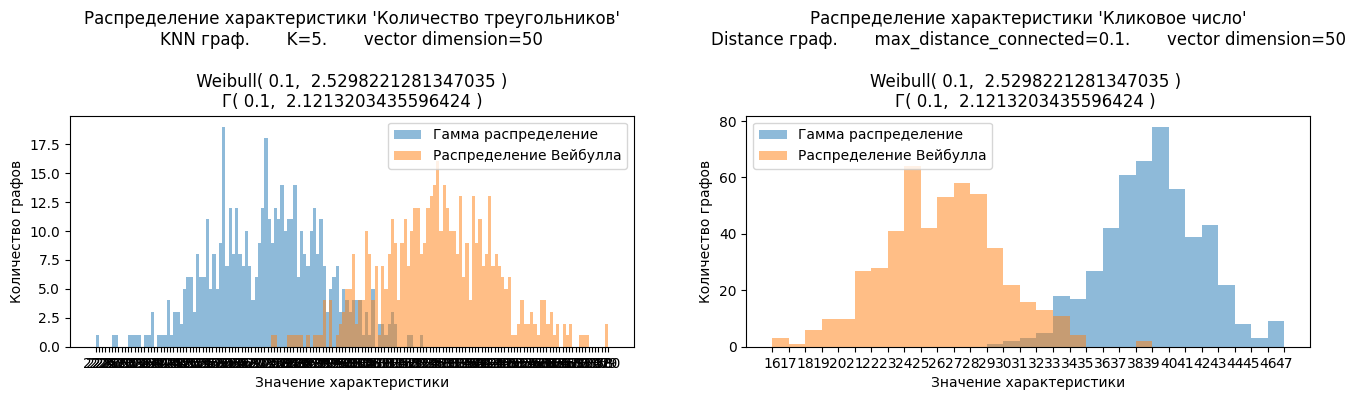

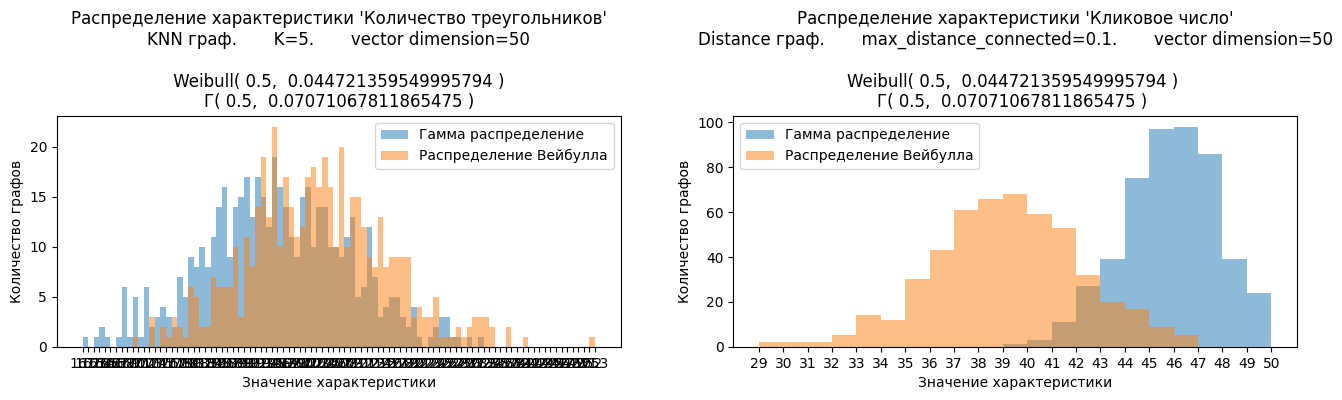

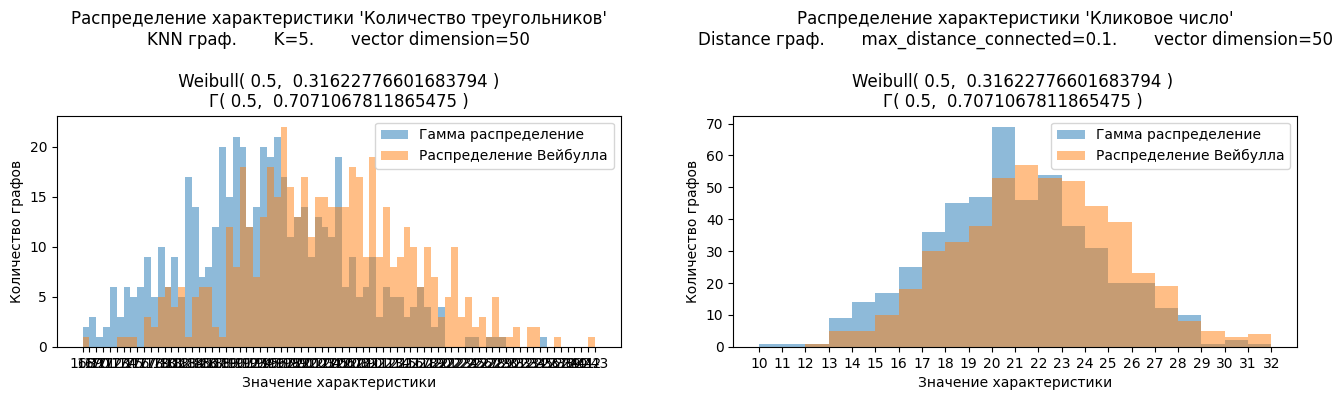

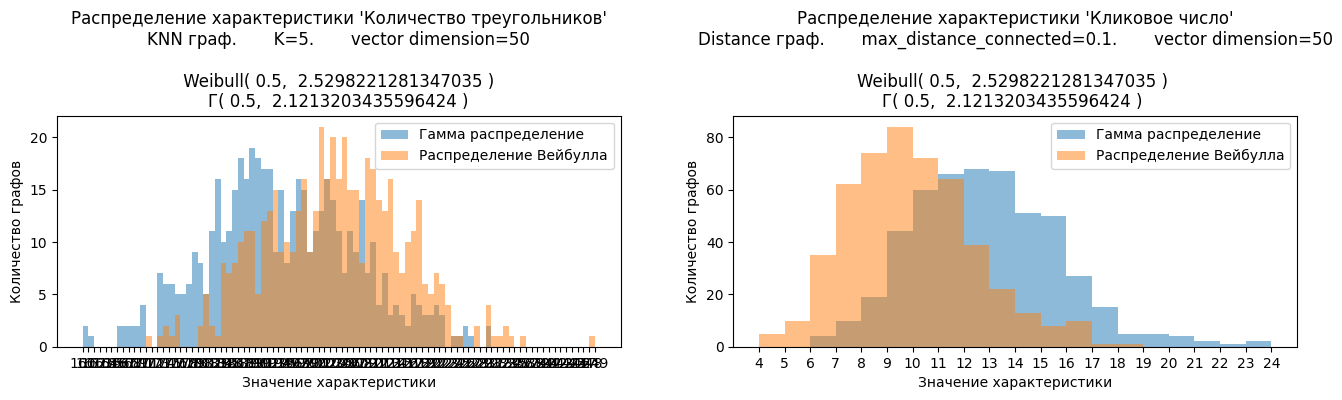

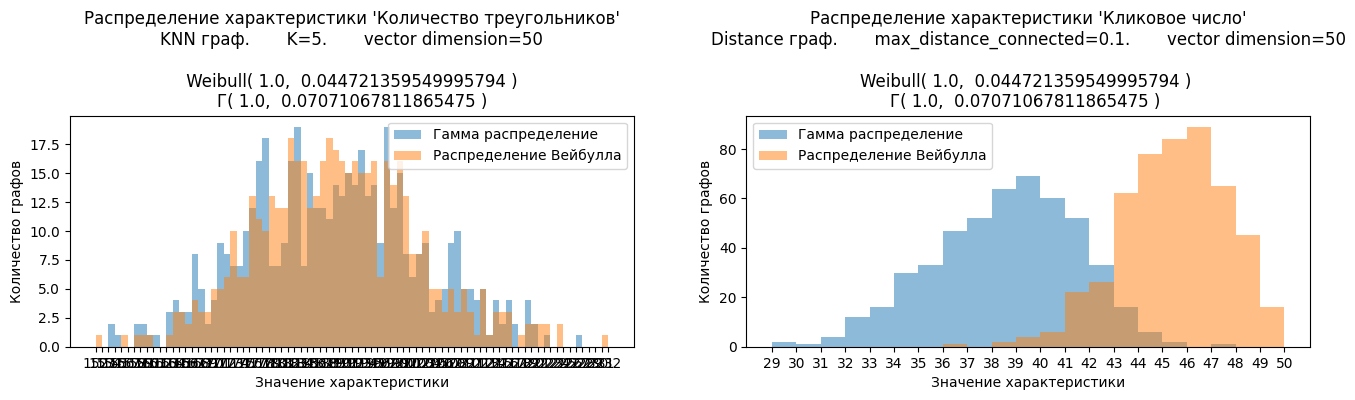

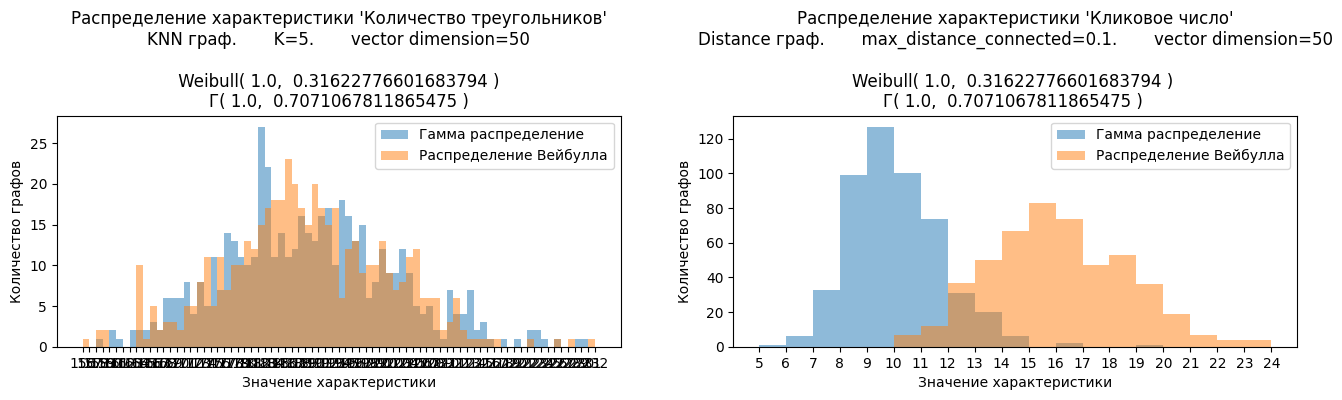

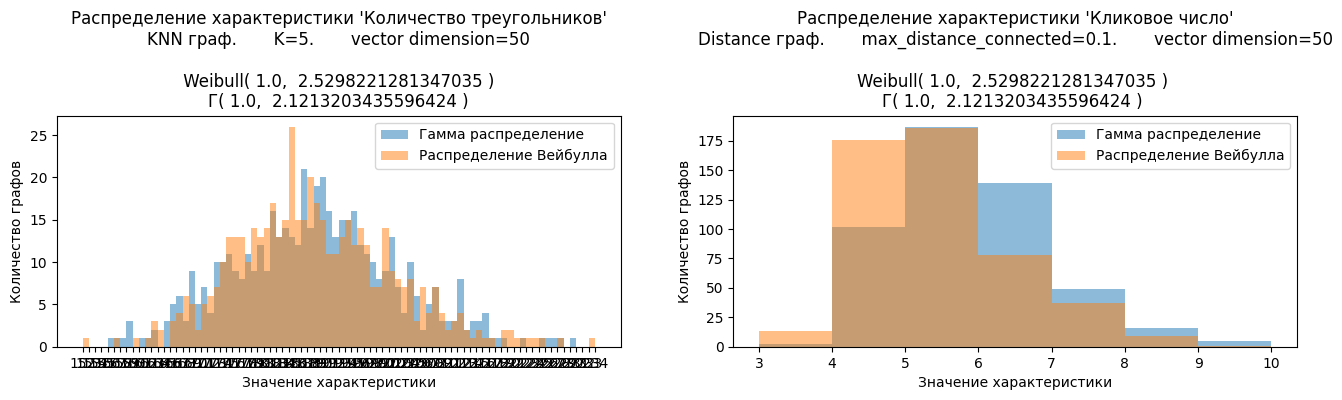

In [4]:
gamma_k_grid = [0.1, 0.5, 1.0]
gamma_lambda_grid = [1 / np.sqrt(200), 1 / np.sqrt(2), 3 / np.sqrt(2)]
weibull_k_grid = [0.1, 0.5, 1.0]
weibull_lambda_grid = [1 / np.sqrt(500), 1 / np.sqrt(10), 8 / np.sqrt(10)]

for k_idx in range(len(gamma_k_grid)):
    for lambda_idx in range(len(gamma_lambda_grid)):
        result = simulate_graph_statistics(
            sample_size = NUM_SAMPLES,
            vector_size = VECTOR_SIZE,
            gamma_k = gamma_k_grid[k_idx],
            gamma_lambda = gamma_lambda_grid[lambda_idx],
            weibull_k = weibull_k_grid[k_idx],
            weibull_lambda = weibull_lambda_grid[lambda_idx],
            T_knn_foo = T_KNN_FOO,
            knn_num_neighbours = NUMBER_NEIGHBOURS,
            T_dist_foo = T_DIST_FOO,
            dist_max_dist = MAX_DISTANCE,
            verbose = True
        )

## **$Τ$ в зависимости от параметров процедуры построения графа и размера выборки**

### **Зафиксируем значения $θ = θ_0$ и $υ = υ_0$**

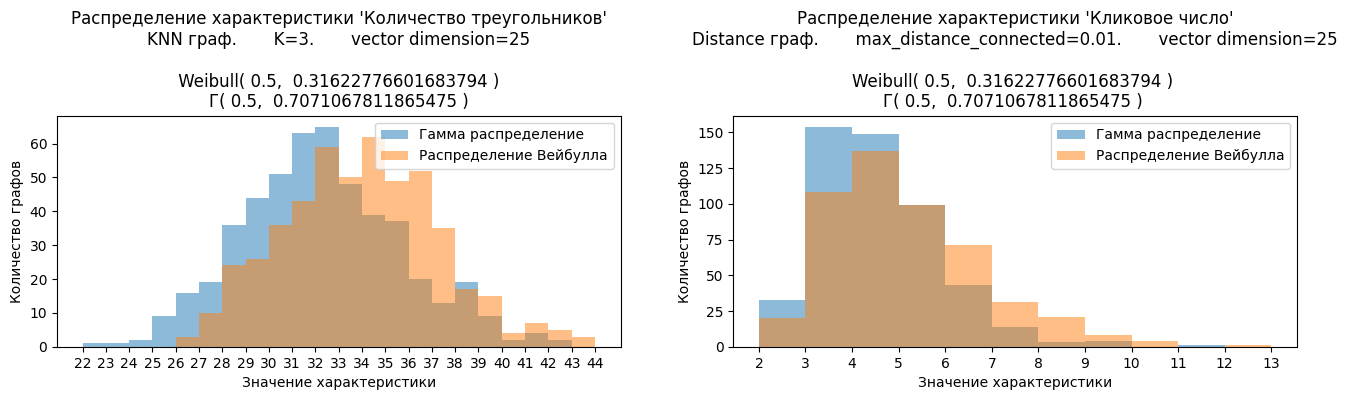

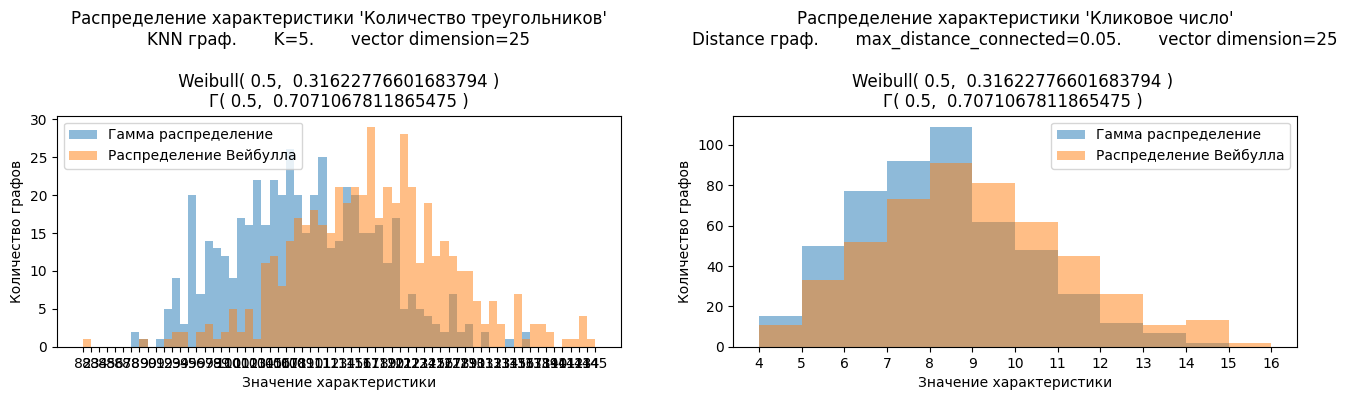

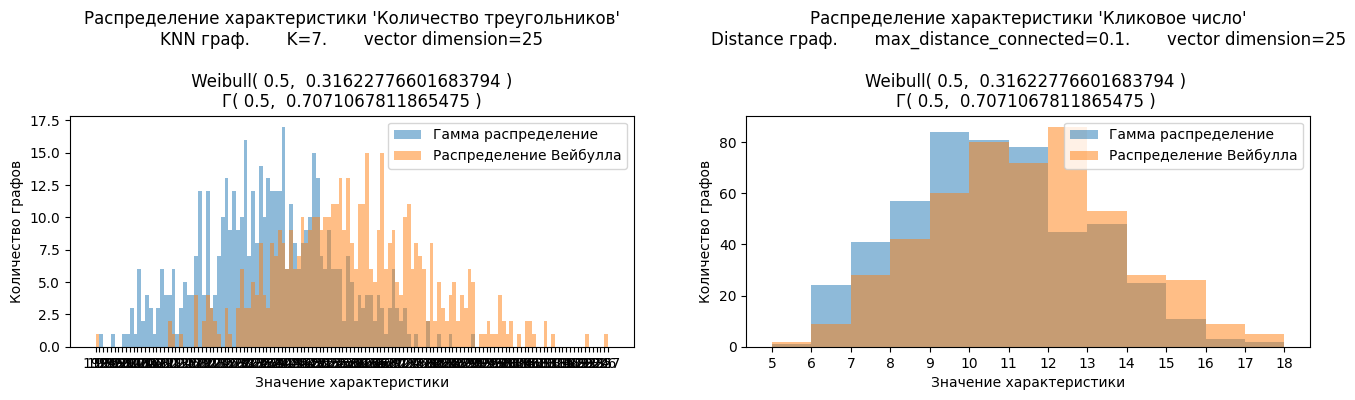

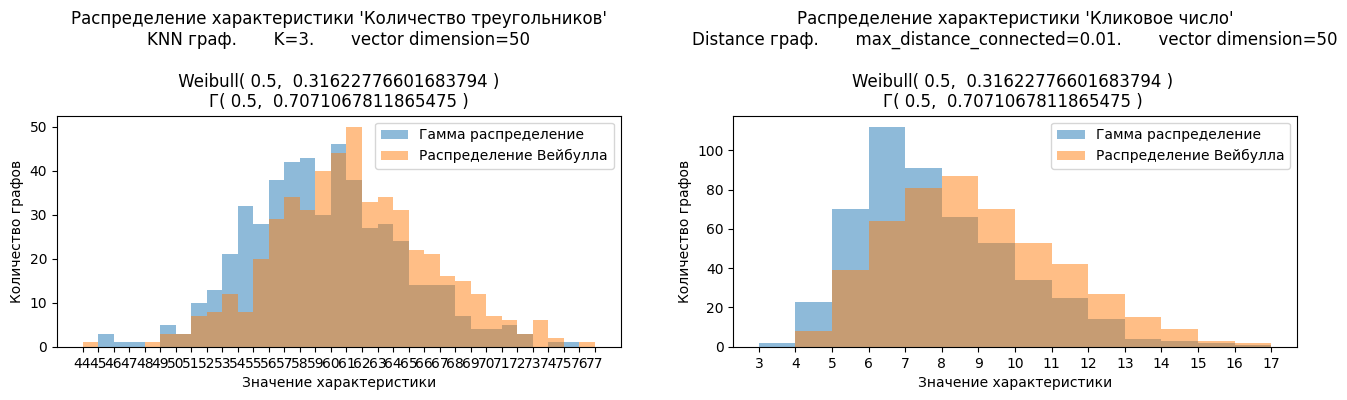

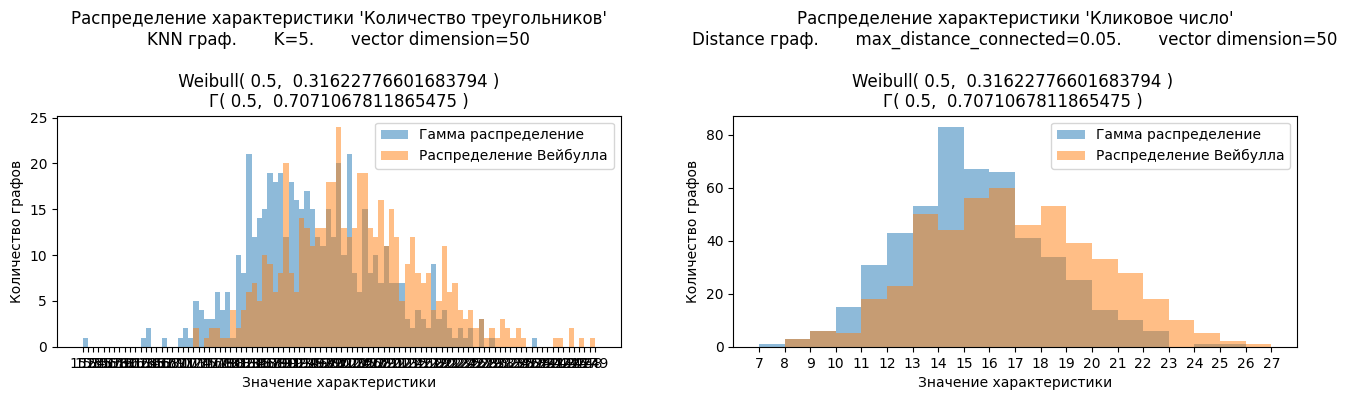

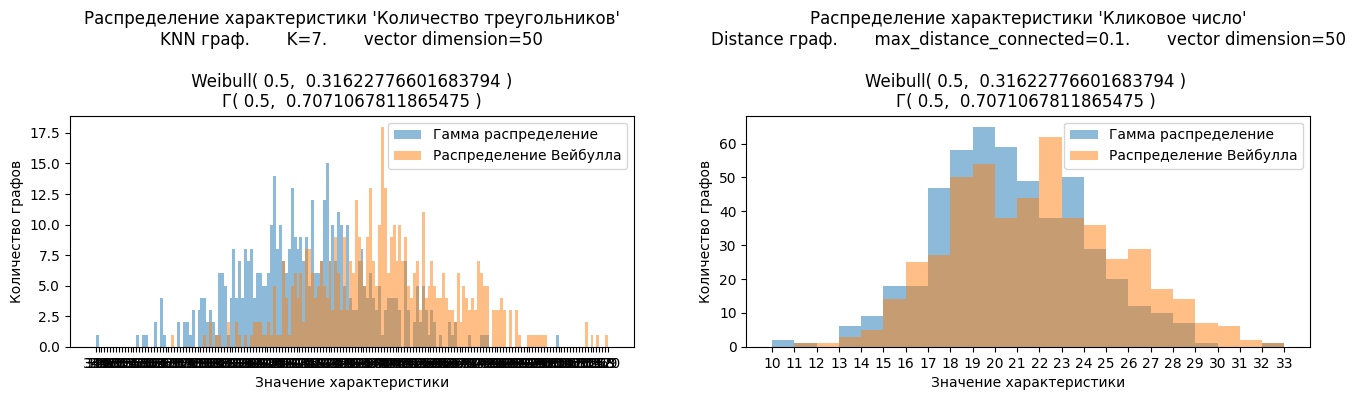

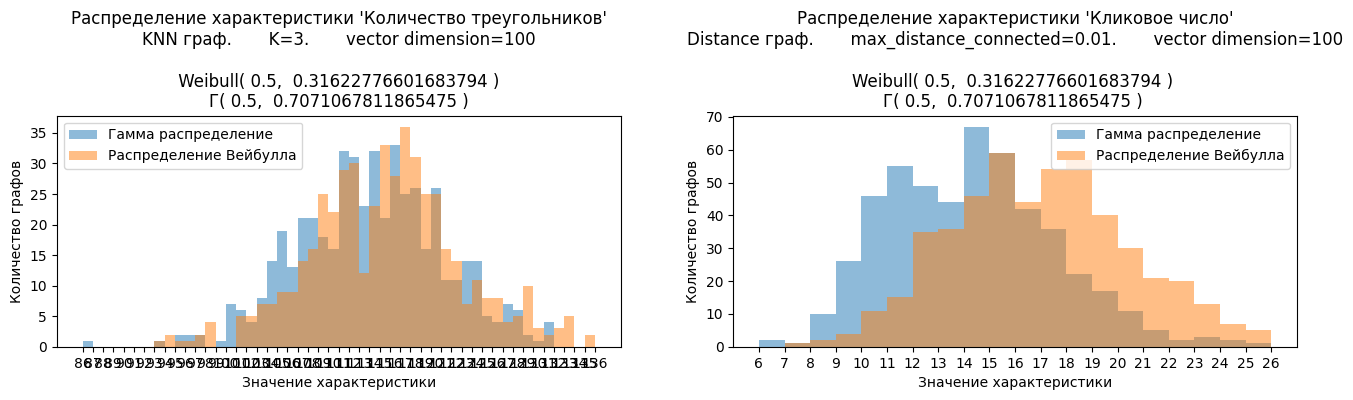

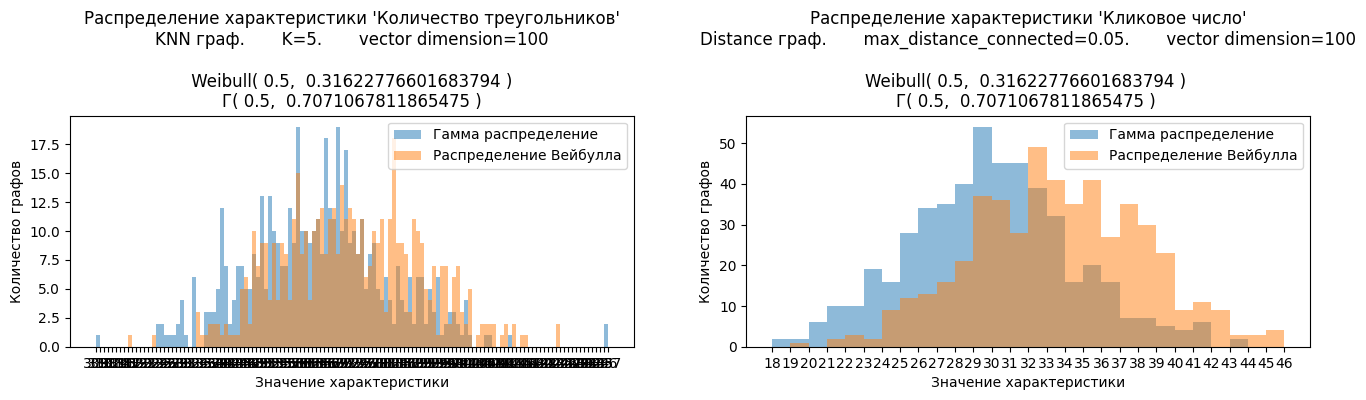

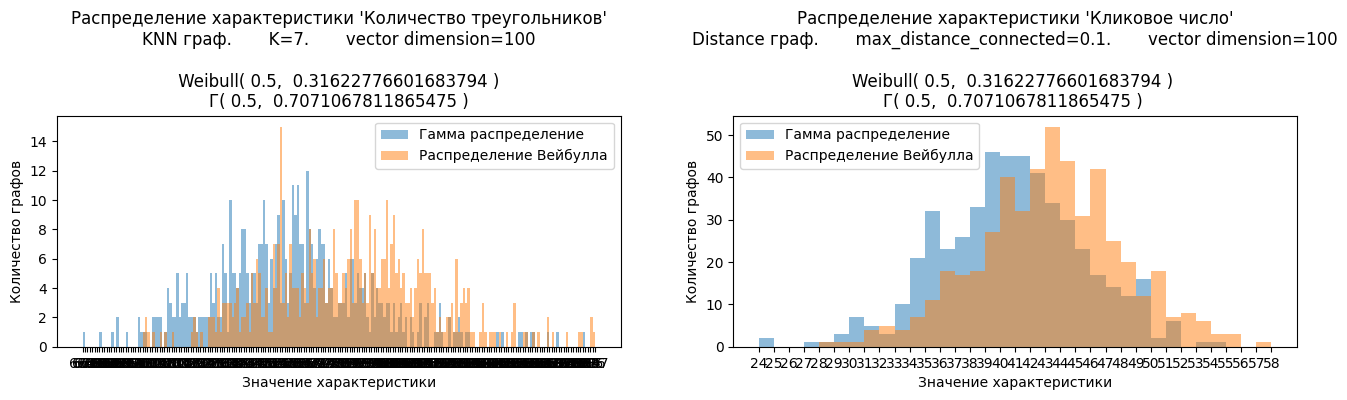

In [5]:
vector_size_grid = [25, 50, 100]
number_neighbour_grid = [3, 5, 7]
max_dist_grid = [0.01, 0.05, 0.1]

for vector_size in vector_size_grid:
    for number_neighbour, max_dist in zip(number_neighbour_grid, max_dist_grid):
        result = simulate_graph_statistics(
            sample_size = NUM_SAMPLES,
            vector_size = vector_size,
            T_knn_foo = T_KNN_FOO,
            knn_num_neighbours = number_neighbour,
            T_dist_foo = T_DIST_FOO,
            dist_max_dist = max_dist,
            verbose = True
        )

## **Построим множество 𝓐**

в предположении $θ = θ_0$ и $υ = υ_0$ при максимальной допустимой вероятности ошибки первого рода α = 0.05.

Оценим мощность полученного критерия.

In [6]:
A_crit = build_critical_region()
print(f"Критическое значение A_crit: {A_crit}")

power, approved = estimate_power(A_crit)
print(f"Мощность критерия: {power:.4f}")
print(f"Считаем, что гамма : {approved:.4f}")

Критическое значение A_crit: 20
Мощность критерия: 0.0000
Считаем, что гамма : 1.0000
